In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from utils import *

import matplotlib.pyplot as plt

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)


In [3]:
# Load Data
X_train, y_train = load_data()

In [4]:
print(f"The shape of X is: {X_train.shape}")
print(f"The shape of y is: {y_train.shape}")


The shape of X is: (5000, 400)
The shape of y is: (5000, 1)


In [5]:
# Split the date into 3 sets: Training, Cross-Validation, and Test sets
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.3, random_state=42)
X_cv, X_test, y_cv, y_test = train_test_split(X_cv, y_cv, test_size=0.4, random_state=42)

# display tyhe dimensions of the different sets
print(f"The shape of the traning set is: X_train = {X_train.shape}, y_train = {y_train.shape}")
print(f"The shape of the cross validation set is: X_cv = {X_cv.shape}, y_cv = {y_cv.shape}")
print(f"The shape of the test set is: X_test = {X_test.shape}, y_test = {y_test.shape}")


The shape of the traning set is: X_train = (3500, 400), y_train = (3500, 1)
The shape of the cross validation set is: X_cv = (900, 400), y_cv = (900, 1)
The shape of the test set is: X_test = (600, 400), y_test = (600, 1)


In [6]:
# Display the 1st five examples
print(X_train[:5])
print(y_train[:5])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[3]
 [4]
 [8]
 [2]
 [4]]


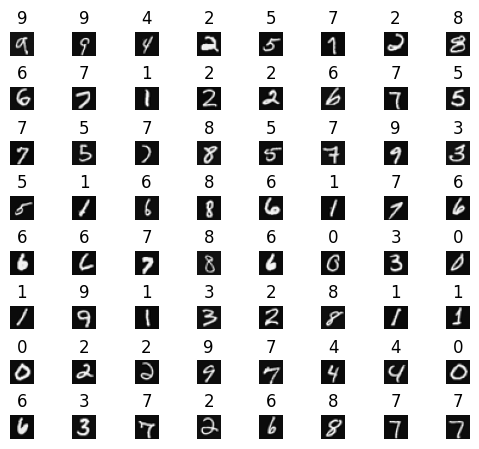

In [7]:
m, n = X_train.shape

fig, axes = plt.subplots(8, 8, figsize=(5, 5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91])

for i, ax in enumerate(axes.flat):
    # Select random example
    rand_index = np.random.randint(m)   

    # Select the ro corresponding to the index generated, and reshape it
    X_random = X_train[rand_index].reshape(20, 20).T

    ax.imshow(X_random, cmap='gray')

    # Display label above the image
    ax.set_title(y_train[rand_index, 0])
    ax.set_axis_off()

In [8]:
# Building the neural network

tf.random.set_seed(1234) # for consistent results

In [9]:
# Training phase while experimenting to find the best alpha and lambda combination
learning_rates = [0.0001, 0.001, 0.003, 0.006, 0.01, 0.03, 0.07, 0.1]
lambda_range = [0, 0.0001, 0.001, 0.003, 0.006, 0.01, 0.03, 0.07, 0.1]
J_history  = []

for lr in learning_rates:
    for lambda_ in lambda_range:

        model = build_model(lambda_=lambda_)
        print(f"Training with learning rate: {lr} and lambda: {lambda_}")
        
        model.compile(
            loss= SparseCategoricalCrossentropy(from_logits=True),
            optimizer = Adam(learning_rate=lr),
        )

        history = model.fit(
            X_train, y_train,
            epochs = 54,
            verbose = 0
        )

        J_history.append(
            {
                'lr': lr,
                'lambda': lambda_,
                'history': history.history
            }
        )
            

print(J_history)

Training with learning rate: 0.0001 and lambda: 0
Training with learning rate: 0.0001 and lambda: 0.0001
Training with learning rate: 0.0001 and lambda: 0.001
Training with learning rate: 0.0001 and lambda: 0.003
Training with learning rate: 0.0001 and lambda: 0.006
Training with learning rate: 0.0001 and lambda: 0.01
Training with learning rate: 0.0001 and lambda: 0.03
Training with learning rate: 0.0001 and lambda: 0.07
Training with learning rate: 0.0001 and lambda: 0.1
Training with learning rate: 0.001 and lambda: 0
Training with learning rate: 0.001 and lambda: 0.0001
Training with learning rate: 0.001 and lambda: 0.001
Training with learning rate: 0.001 and lambda: 0.003
Training with learning rate: 0.001 and lambda: 0.006
Training with learning rate: 0.001 and lambda: 0.01
Training with learning rate: 0.001 and lambda: 0.03
Training with learning rate: 0.001 and lambda: 0.07
Training with learning rate: 0.001 and lambda: 0.1
Training with learning rate: 0.003 and lambda: 0
Trai

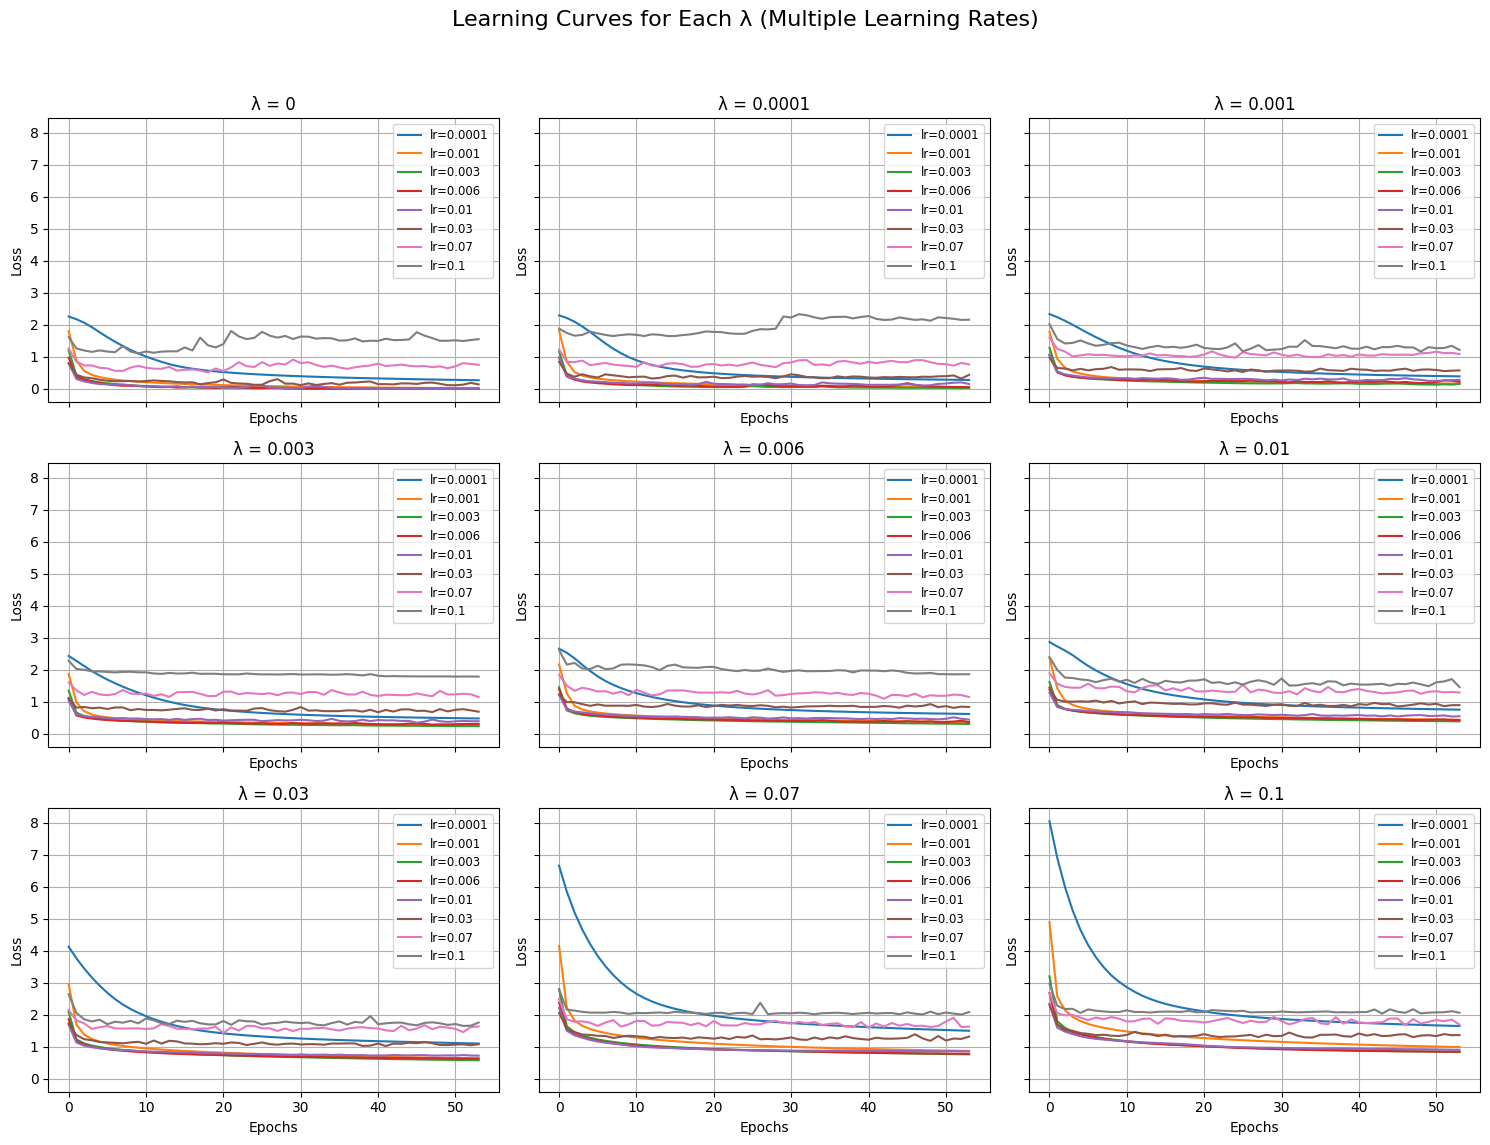

In [10]:
# Get all unique lambda values in your experiment
lambda_values = sorted(set(entry['lambda'] for entry in J_history))
learning_rates = sorted(set(entry['lr'] for entry in J_history))

# Layout: determine rows/cols
n_cols = 3
n_rows = (len(lambda_values) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows), sharex=True, sharey=True)

# Flatten axes for easier iteration
axes = axes.flatten()

# Plot for each lambda value
for i, lambda_ in enumerate(lambda_values):
    ax = axes[i]
    for entry in J_history:
        if entry['lambda'] == lambda_:
            lr = entry['lr']
            loss = entry['history']['loss']
            ax.plot(loss, label=f"lr={lr}")
    
    ax.set_title(f"λ = {lambda_}")
    ax.set_xlabel("Epochs")
    ax.set_ylabel("Loss")
    ax.grid(True)
    ax.legend(fontsize='small')

# Turn off unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis("off")

fig.suptitle("Learning Curves for Each λ (Multiple Learning Rates)", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [11]:
best_entry = min(J_history, key=lambda x: x['history']['loss'][-1])
print(f"Best combination:\nLearning rate: {best_entry['lr']}\nLambda: {best_entry['lambda']}")

Best combination:
Learning rate: 0.01
Lambda: 0


##
We will choose the learning rate to be 0.001 instead of any other value, because when using a value other than 0.001, the learning curve doesn't converge smoothly to 0. You can test it yourslef by changing the learning rate.

In [12]:
# Now lets use the optimal value of the learning rate in order to construct the optimal model

model_up = build_model(lambda_=best_entry['lambda'])

model_up.compile(
        loss= SparseCategoricalCrossentropy(from_logits=True),
        optimizer = Adam(learning_rate=0.001),
    )

history_up = model_up.fit(
    X_train, y_train,
    epochs = 54
)



Epoch 1/54
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.0426
Epoch 2/54
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8768
Epoch 3/54
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5190
Epoch 4/54
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3977
Epoch 5/54
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3316
Epoch 6/54
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2881
Epoch 7/54
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2557
Epoch 8/54
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2301
Epoch 9/54
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2089
Epoch 10/54
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1912
Epoch 11/54
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1763
Epoch 12/54
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1633
Epoch 13/54
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1512
Epoch 14/54
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1411
Epoch 15/54
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - lo

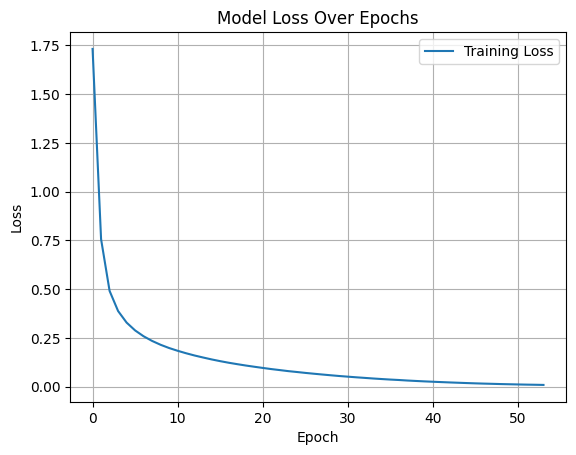

In [13]:
# Plot training loss values corresponding to the chosen learning rate
plt.plot(history_up.history['loss'], label='Training Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
# Predicting on the training and the cross validation sets
logits_train = model_up.predict(X_train)
logits_cv = model_up.predict(X_cv)


110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [15]:
# Converting logits to probabilities
train_pred = tf.nn.softmax(logits_train).numpy()
cv_pred = tf.nn.softmax(logits_cv).numpy()

print(train_pred.shape)

y_train_pred = np.argmax(train_pred, axis=1)
y_cv_pred = np.argmax(cv_pred, axis=1)

print(y_cv_pred.shape)



(3500, 10)
(900,)


In [16]:
train_classification_error = np.mean(y_train.flatten() != y_train_pred)
cv_classification_error = np.mean(y_cv.flatten() != y_cv_pred)
print(f"Training Classification Error: {train_classification_error:.4f}")
print(f"Validation Classification Error: {cv_classification_error:.4f}")

print(f"The accuracy of the training set: {accuracy_score(y_train, y_train_pred)}")
print(f"The accuracy of the validation set: {accuracy_score(y_cv, y_cv_pred)}")


Training Classification Error: 0.0006
Validation Classification Error: 0.0811
The accuracy of the training set: 0.9994285714285714
The accuracy of the validation set: 0.9188888888888889


In [17]:
# 1. Check data
print("Label distribution:", np.unique(y_train, return_counts=True))
print("Input shape:", X_train.shape)
print("Label range:", y_train.min(), "to", y_train.max())

# 2. Check model predictions
print("Raw logits range:", logits_train.min(), "to", logits_train.max())
print("Prediction distribution:", np.unique(y_train_pred, return_counts=True))

# 3. Check if model is predicting same class for everything
print("Unique predictions:", len(np.unique(y_train_pred)))

Label distribution: (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([336, 348, 345, 346, 357, 359, 357, 342, 368, 342]))
Input shape: (3500, 400)
Label range: 0 to 9
Raw logits range: -51.97516 to 32.825275
Prediction distribution: (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([336, 349, 345, 344, 357, 359, 357, 343, 368, 342]))
Unique predictions: 10


In [18]:
from utils import display_predictions_grid

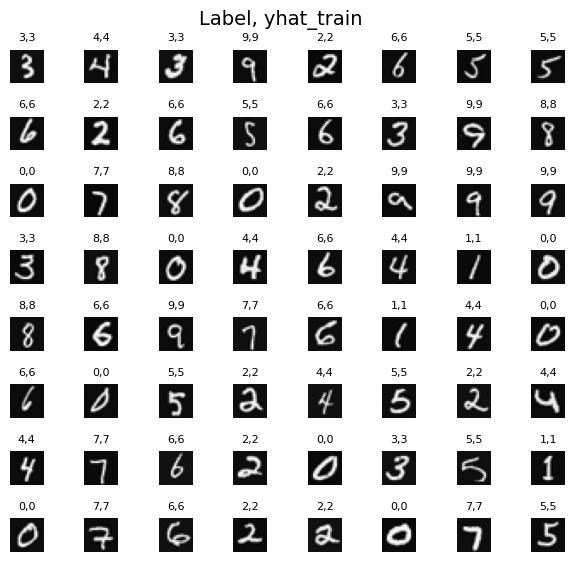

In [19]:
display_predictions_grid(X_train, y_train, model_up, title="Label, yhat_train", sample_size=64)

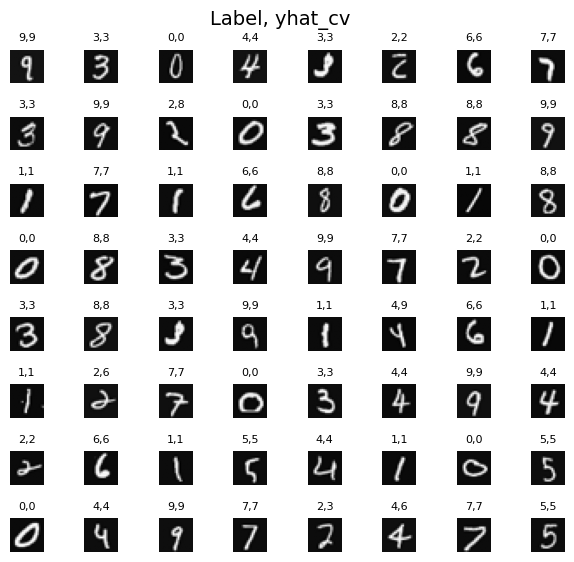

In [20]:
display_predictions_grid(X_cv, y_cv, model_up, title="Label, yhat_cv")

In [ ]:
# Evaluating the model using the test set
logits_test = model_up.predict(X_test)
test_pred = tf.nn.softmax(logits_test).numpy()



19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [29]:
y_test_pred = np.argmax(test_pred, axis=1)
y_test_pred.shape


(600,)

In [30]:
test_classification_error = np.mean(y_test.flatten() != y_test_pred)
print(f"Test Classification Error: {test_classification_error:.4f}")
print(f"The accuracy of the test set: {accuracy_score(y_test, y_test_pred)}")

Test Classification Error: 0.0700
The accuracy of the test set: 0.93


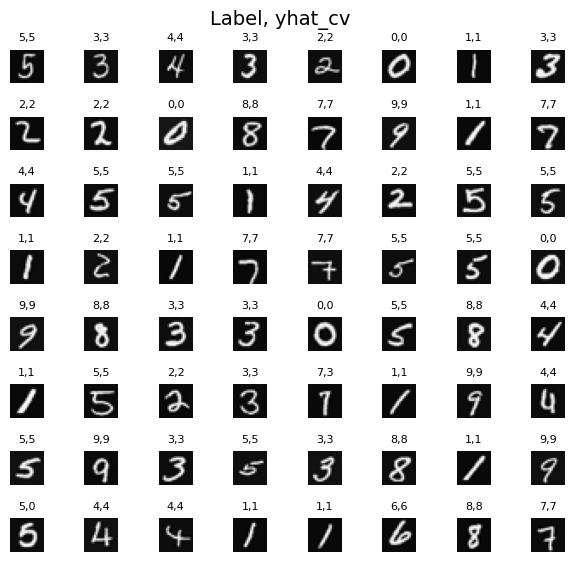

In [31]:
display_predictions_grid(X_test, y_test, model_up, title="Label, yhat_test")